In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

import matplotlib.pyplot as plt
%matplotlib inline


In [74]:

training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.5%20EDA/data/titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:

training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [77]:

def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

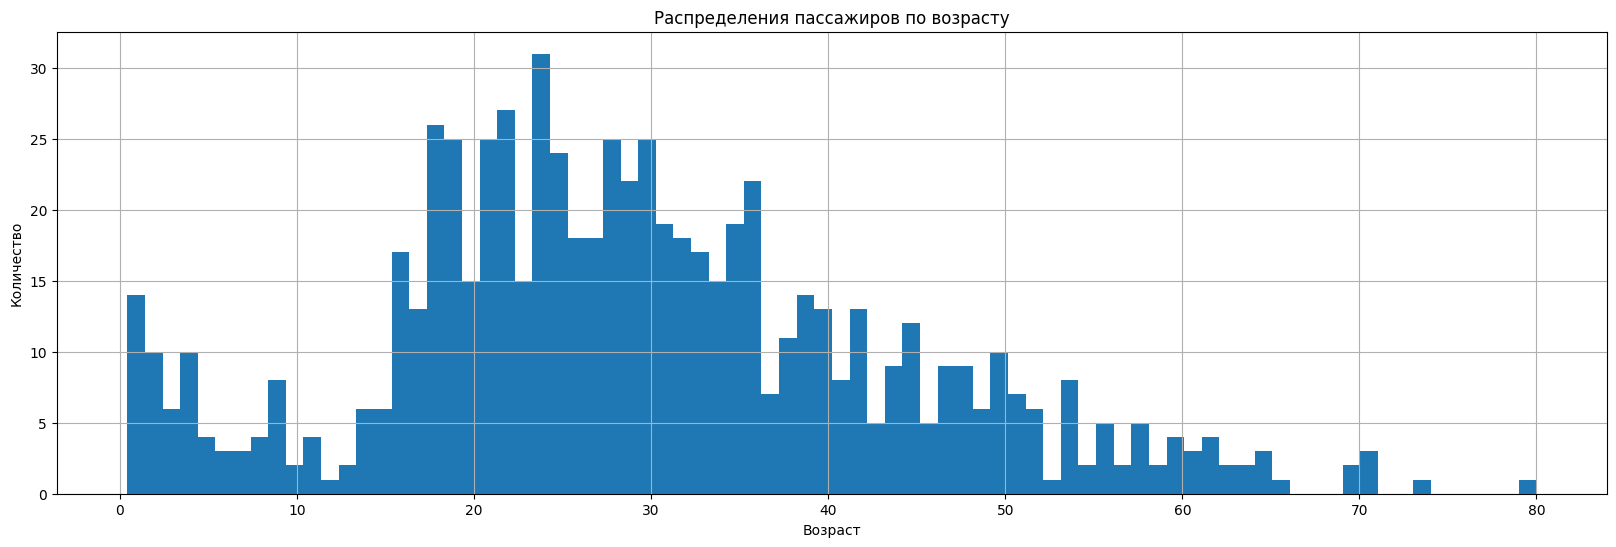

In [78]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

In [79]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [80]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])
training_set['Sex'].unique()
np.unique(cat_enc_le)
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])

In [81]:
pd.get_dummies(training_set['Sex']).astype(int).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [82]:
pd.get_dummies(training_set['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [83]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(training_set['Embarked'], drop_first=True).astype(int)

In [84]:
training_set = pd.concat([training_set, sex, embark], axis=1)


In [85]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)
df = training_set.copy()

In [71]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Задание 1

In [42]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_set.iloc[:,1:], training_set.iloc[:,0], test_size=0.33, random_state=42)
clf =  LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)


0.7829787234042553


Задание 3

In [43]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.5%20EDA/data/titanic.csv')

Доля выживших пассажиров: 0.38
Доля мужчин и женщин среди выживших:
Sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64


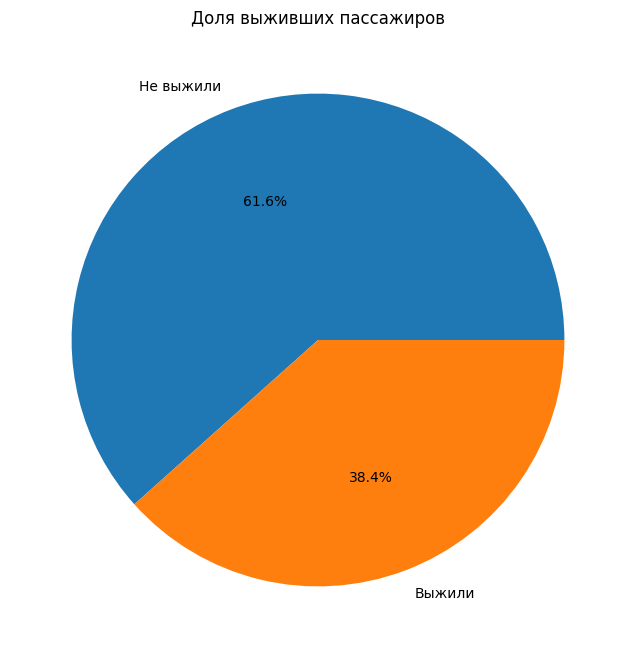

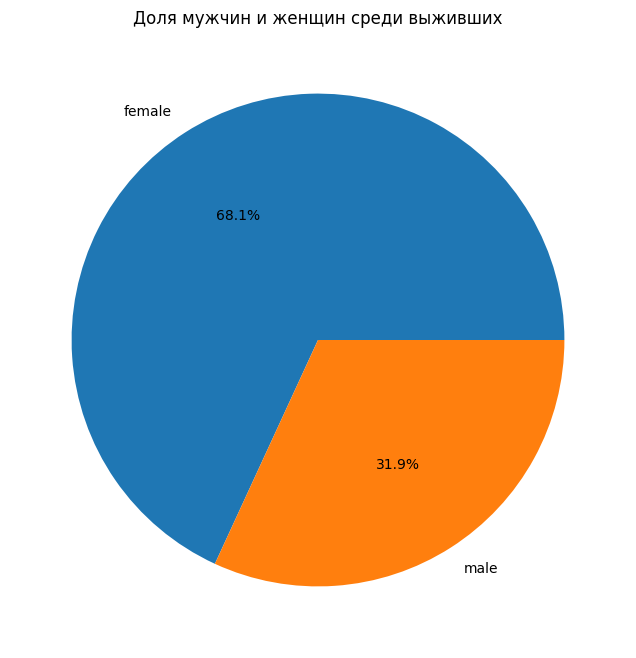

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Посчитаем долю выживших пассажиров
survival_rate = training_set['Survived'].mean()
print(f"Доля выживших пассажиров: {survival_rate:.2f}")

# Посчитаем долю мужчин и женщин среди выживших
survived = training_set[training_set['Survived'] == 1]
gender_survival_rate = survived['Sex'].value_counts(normalize=True)
print("Доля мужчин и женщин среди выживших:")
print(gender_survival_rate)

# Визуализация доли выживших пассажиров
plt.figure(figsize=(8, 8))
survived_counts = training_set['Survived'].value_counts()
plt.pie(survived_counts, labels=['Не выжили', 'Выжили'], autopct='%1.1f%%')
plt.title('Доля выживших пассажиров')
plt.show()

# Визуализация доли мужчин и женщин среди выживших
plt.figure(figsize=(8, 8))
plt.pie(gender_survival_rate, labels=gender_survival_rate.index, autopct='%1.1f%%')
plt.title('Доля мужчин и женщин среди выживших')
plt.show()


Задание 4

Количество пассажиров в каждом классе:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Количество мужчин и женщин в классе 3:
Sex
male      347
female    144
Name: count, dtype: int64


<ipython-input-51-2253e10af1bb>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


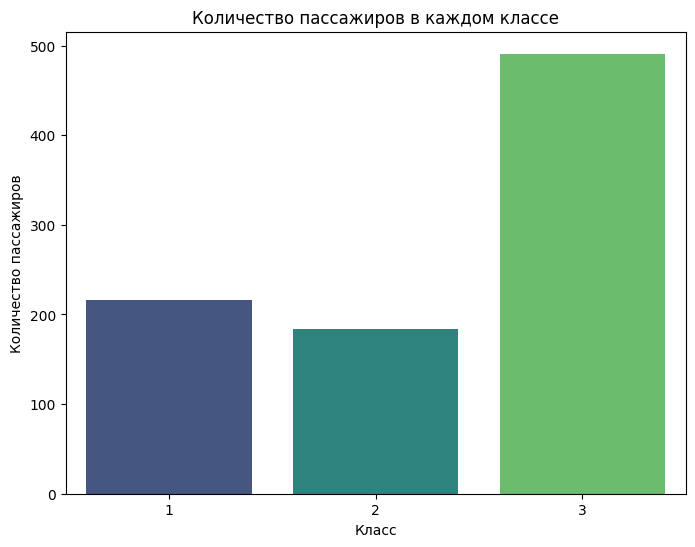

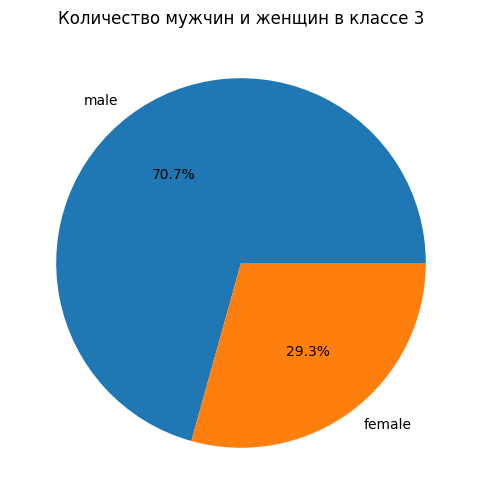

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Подсчитаем количество пассажиров в каждом классе
class_counts = training_set['Pclass'].value_counts().sort_index()
print("Количество пассажиров в каждом классе:")
print(class_counts)

# Определим самый многолюдный класс
most_populous_class = class_counts.idxmax()

# Подсчитаем количество мужчин и женщин в самом многолюдном классе
gender_counts_most_populous_class = training_set[training_set['Pclass'] == most_populous_class]['Sex'].value_counts()
print(f"\nКоличество мужчин и женщин в классе {most_populous_class}:")
print(gender_counts_most_populous_class)

# Визуализация количества пассажиров в каждом классе
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров в каждом классе')
plt.show()

# Визуализация количества мужчин и женщин в самом многолюдном классе
plt.figure(figsize=(8, 6))
plt.pie(gender_counts_most_populous_class, labels=gender_counts_most_populous_class.index, autopct='%1.1f%%')
plt.title(f'Количество мужчин и женщин в классе {most_populous_class}')
plt.show()


Задание 5
Не все признаки могут нести полезную информацию. Например, уникальный идентификатор пассажира (PassengerId), имя (Name) и номер билета (Ticket) могут не иметь прямого отношения к выживаемости пассажиров. Кроме того, столбец с номером каюты (Cabin) содержит много пропущенных значений.

In [52]:
training_set_dropped = training_set.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

print(training_set_dropped.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


Задание 6


In [53]:
# Расчет корреляции Пирсона
correlation = training_set['Fare'].corr(training_set['Age'])
print("Корреляция между ценой за билет и возрастом пассажиров:", correlation)


Корреляция между ценой за билет и возрастом пассажиров: 0.09606669176903888


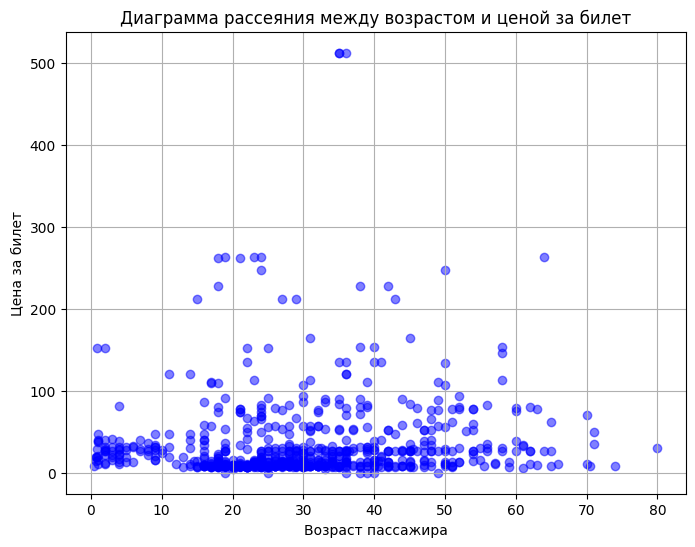

In [54]:
import matplotlib.pyplot as plt

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(training_set['Age'], training_set['Fare'], color='blue', alpha=0.5)
plt.title('Диаграмма рассеяния между возрастом и ценой за билет')
plt.xlabel('Возраст пассажира')
plt.ylabel('Цена за билет')
plt.grid(True)
plt.show()


задание 7

<ipython-input-55-aac4ccd7fa6e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='coolwarm')


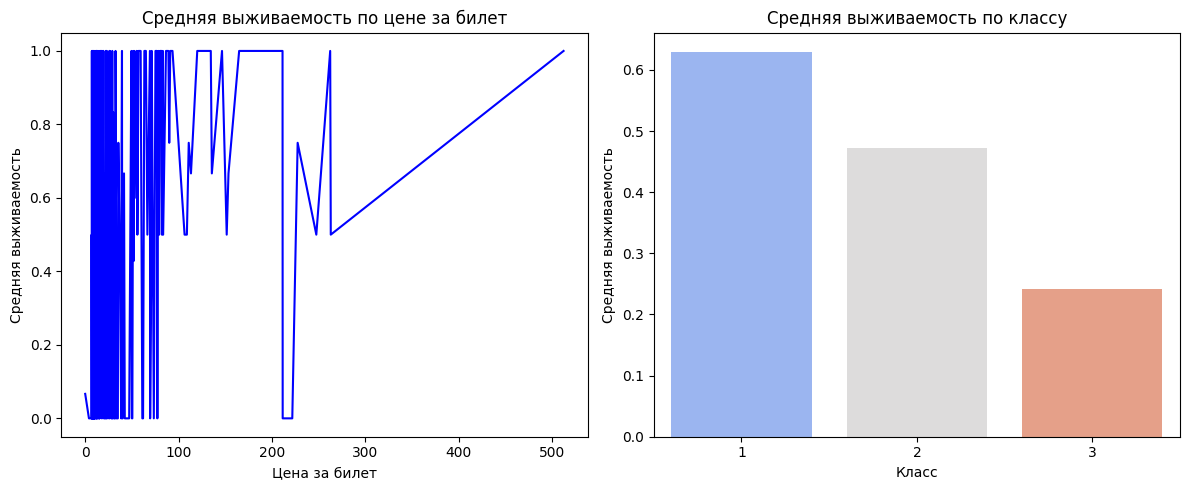

In [55]:
import seaborn as sns

# Группировка данных по цене за билет и классу, и вычисление средней выживаемости
survival_by_fare = training_set.groupby(['Fare'])['Survived'].mean()
survival_by_class = training_set.groupby(['Pclass'])['Survived'].mean()

# Визуализация
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=survival_by_fare.index, y=survival_by_fare.values, color='blue')
plt.title('Средняя выживаемость по цене за билет')
plt.xlabel('Цена за билет')
plt.ylabel('Средняя выживаемость')

plt.subplot(1, 2, 2)
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='coolwarm')
plt.title('Средняя выживаемость по классу')
plt.xlabel('Класс')
plt.ylabel('Средняя выживаемость')

plt.tight_layout()
plt.show()


В первом классе выжило больше человек, чем в остальных, но это може быть свзано с тем, что там больше людей ехало.

Задание 8

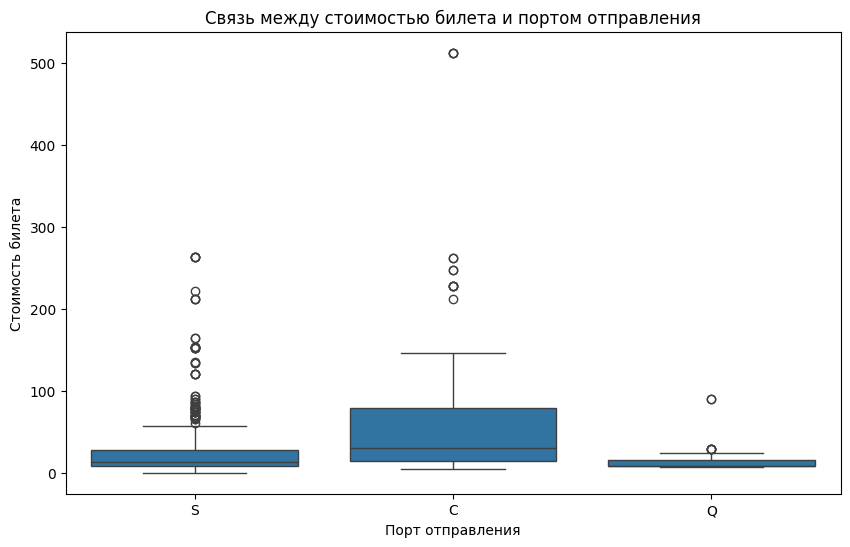

Минимальная стоимость билета: 0.0
Средняя стоимость билета: 32.204207968574636
Максимальная стоимость билета: 512.3292

Статистика для пассажиров, севших в Саутгемптоне:
Минимальная стоимость билета: 0.0
Средняя стоимость билета: 27.079811801242233
Максимальная стоимость билета: 263.0


In [56]:
# Связь между стоимостью билета и портом отправления
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', data=training_set)
plt.title('Связь между стоимостью билета и портом отправления')
plt.xlabel('Порт отправления')
plt.ylabel('Стоимость билета')
plt.show()

# Минимальная, средняя и максимальная сумма, которую заплатили пассажиры за проезд
min_fare = training_set['Fare'].min()
mean_fare = training_set['Fare'].mean()
max_fare = training_set['Fare'].max()

print("Минимальная стоимость билета:", min_fare)
print("Средняя стоимость билета:", mean_fare)
print("Максимальная стоимость билета:", max_fare)

# Статистика для пассажиров, севших в Саутгемптоне
fare_southampton = training_set[training_set['Embarked'] == 'S']['Fare']
min_fare_southampton = fare_southampton.min()
mean_fare_southampton = fare_southampton.mean()
max_fare_southampton = fare_southampton.max()

print("\nСтатистика для пассажиров, севших в Саутгемптоне:")
print("Минимальная стоимость билета:", min_fare_southampton)
print("Средняя стоимость билета:", mean_fare_southampton)
print("Максимальная стоимость билета:", max_fare_southampton)


Из порта С билеты дороже

задание 9

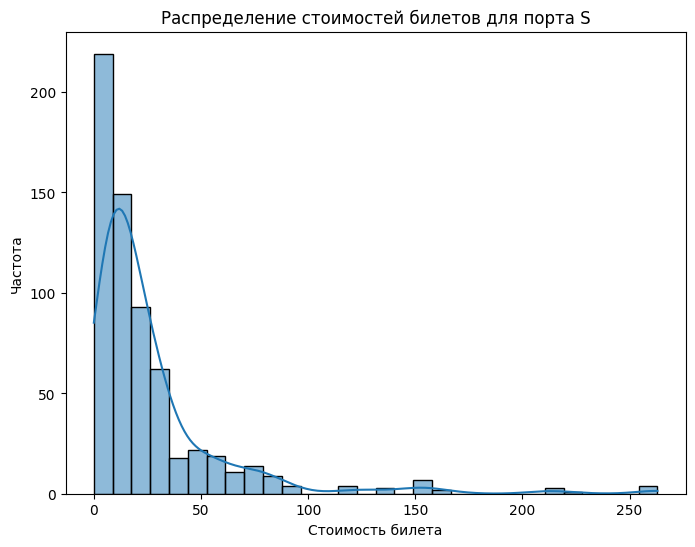

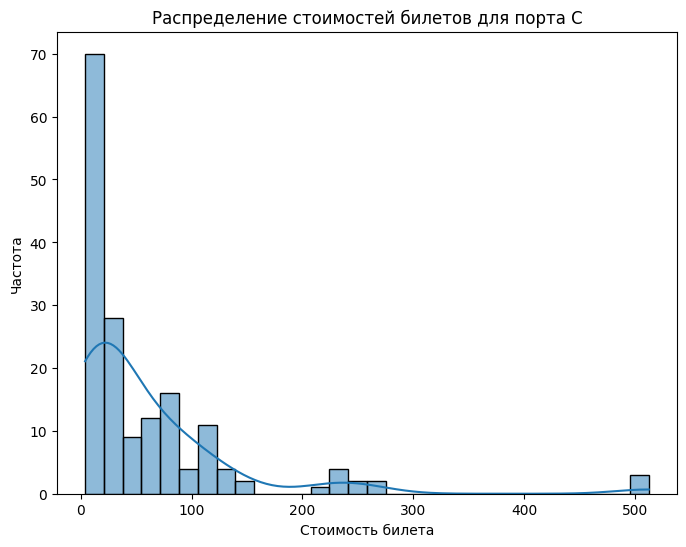

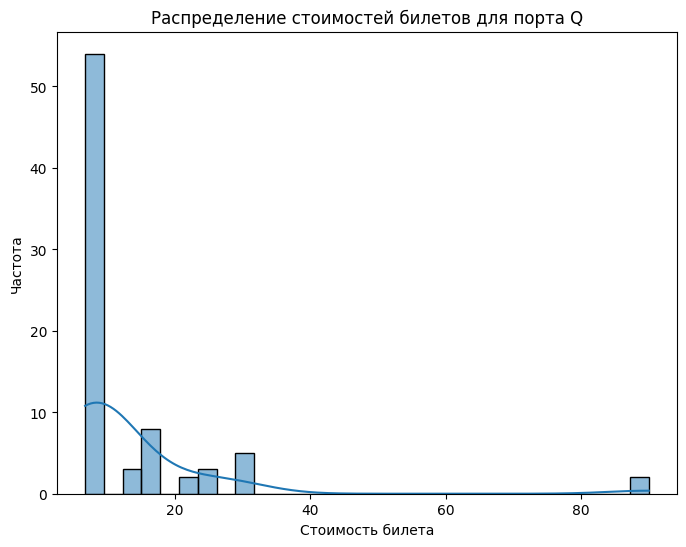

In [61]:
# Получаем уникальные порты, исключая значения NaN
embarked_ports = training_set['Embarked'].dropna().unique()

# Создаем гистограммы для каждого порта отдельно
for port in embarked_ports:
    plt.figure(figsize=(8, 6))
    data_subset = training_set[training_set['Embarked'] == port]
    sns.histplot(data=data_subset, x='Fare', bins=30, kde=True)
    plt.title(f'Распределение стоимостей билетов для порта {port}')
    plt.xlabel('Стоимость билета')
    plt.ylabel('Частота')
    plt.show()




Задание 10

In [62]:
print("Всего пассажиров Титаника = ", training_set.shape[0])
print("Выжило = ", training_set['Survived'].sum())
print("Доля выборки от генеральной совокупности", 712/891*100)

Всего пассажиров Титаника =  891
Выжило =  342
Доля выборки от генеральной совокупности 79.91021324354658


Задание 11

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.33, random_state=42)



<Axes: ylabel='Frequency'>

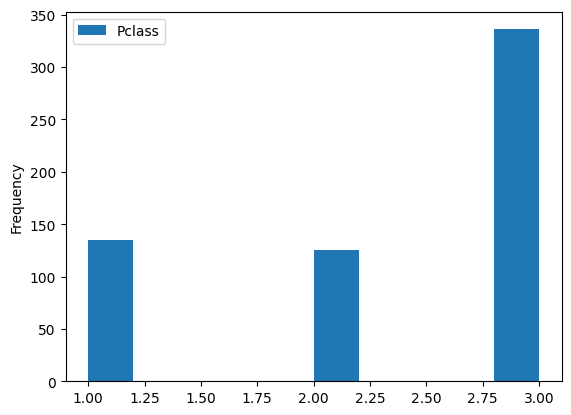

In [87]:
X_train[['Pclass']].plot.hist()

<Axes: ylabel='Frequency'>

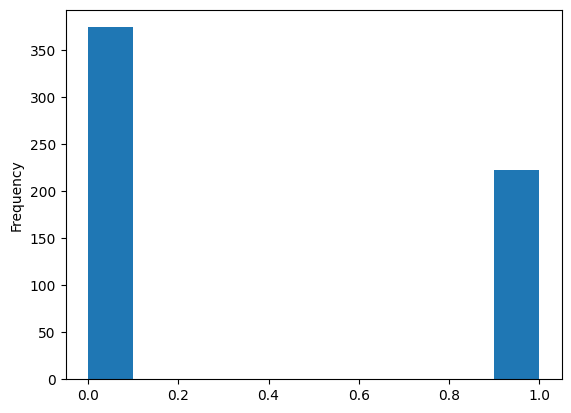

In [88]:
y_train.plot.hist()

Задание 12

In [92]:
# Разделение датасета на отдельные классы
majority_class = training_set[df['Survived'] == 0]
minority_class = training_set[df['Survived'] == 1]

# Случайным образом выбираем объекты из мажоритарного класса так, чтобы их количество соответствовало количеству объектов в миноритарном классе
majority_class_balanced = majority_class.sample(n=len(minority_class), random_state=42)

# Объединяем сбалансированные классы
balanced_dataset = pd.concat([majority_class_balanced, minority_class], axis=0)

# Перемешиваем данные
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42)

# Выводим информацию о количестве объектов в каждом классе
print(balanced_dataset['Survived'].value_counts())


Survived
1    342
0    342
Name: count, dtype: int64


In [93]:
# Рассчитываем необходимое количество дубликатов миноритарного класса
num_duplicates = len(majority_class) - len(minority_class)

# Создаем дубликаты миноритарного класса
minority_duplicates = minority_class.sample(n=num_duplicates, replace=True, random_state=42)

# Объединяем сбалансированные классы
balanced_dataset = pd.concat([df, minority_duplicates], axis=0)

# Перемешиваем данные
balanced_dataset1 = balanced_dataset.sample(frac=1, random_state=42)

# Выводим информацию о количестве объектов в каждом классе
print(balanced_dataset['Survived'].value_counts())


Survived
0    549
1    549
Name: count, dtype: int64


Задание 15

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
# Разделение данных на признаки и целевую переменную
X = balanced_dataset.drop(columns=['Survived'])
y = balanced_dataset['Survived']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Создание и обучение модели логистической регрессии до преобразований
model_before = LogisticRegression()
model_before.fit(X_train, y_train)

# Оценка модели до преобразований
y_pred_before = model_before.predict(X_test)
print("После удаления строк:")
print(classification_report(y_test, y_pred_before))

X = balanced_dataset1.drop(columns=['Survived'])
y = balanced_dataset1['Survived']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Создание и обучение модели логистической регрессии после преобразований
model_after = LogisticRegression()
model_after.fit(X_train, y_train)

# Оценка модели после преобразований
y_pred_after = model_after.predict(X_test)
print("После добавления строк:")
print(classification_report(y_test, y_pred_after))


Метрики модели до преобразований:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       165
           1       0.79      0.76      0.77       165

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330

Метрики модели после преобразований:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       171
           1       0.78      0.77      0.78       159

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7829787234042553 - с самого начала\\\\\\
видно что точность стала чуть лучше

Задание 16

<Axes: >

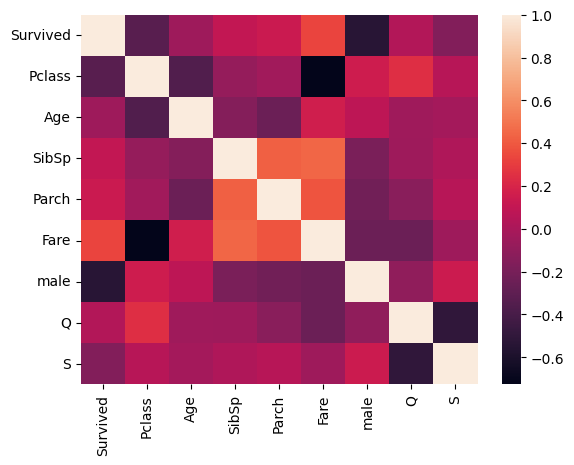

In [101]:

sns.heatmap(balanced_dataset1.corr(method='spearman'))


Из матрицы корреляции видно, что существует выраженная обратная связь между полом пассажиров и их выживаемостью, а также между классом обслуживания и полом. Также заметна сильная прямая связь между количеством родителей/детей и количеством братьев/сестер/супругов, а также между количеством детей/супругов и ценой билетов.

Задание 17

In [110]:
# Создание функции для определения возрастной категории
def age_category(age):
    if age < 18:
        return "ребенок"
    elif age >= 18 and age < 65:
        return "взрослый"
    elif age > 65:
        return "старик"

# Применение функции к столбцу с возрастом и создание нового столбца с возрастной категорией
df['возрастная категория'] = df['Age'].apply(age_category)

# Выводим первые строки для проверки
df[['Age', 'возрастная категория']].head()


,Age,возрастная категория
0,22.0,взрослый
1,38.0,взрослый
2,26.0,взрослый
3,35.0,взрослый
4,35.0,взрослый


Text(0.5, 1.0, 'Число выживших по возрасту')

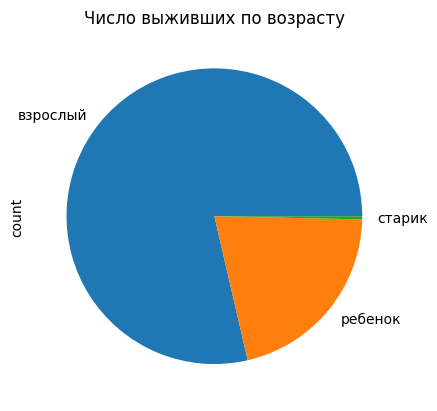

In [111]:

df[df['Survived'] == 1]['возрастная категория'].value_counts().plot.pie()
plt.title("Число выживших по возрасту")